Ce projet explore les données cliniques sur le diabète afin de révéler des tendances et des relations cachées dans les données des patients et à prédire le diabète en fonction de facteurs démographiques et médicaux. Ce sujet est pertinent car le diabète est un enjeu majeur de santé publique.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Chargement des données
df = pd.read_csv("diabetes_dataset_with_notes.csv")


In [6]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0,Elderly patient with increased risk of chronic...
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,"Obese category, increased risk for diabetes an..."
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,"Overweight, advised dietary and exercise modif..."


Le dataset contient des informations détaillées sur les patients, notamment :

    Données démographiques : année, sexe, âge, localisation, et race.
    Facteurs médicaux : hypertension, maladies cardiaques, antécédents de tabagisme, indice de masse corporelle (BMI), niveau d'HbA1c, taux de glucose dans le sang, et statut diabétique.
    Notes cliniques : des observations textuelles spécifiques pour chaque patient.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [55]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# D'après le dataset initial, des colonnes potentielles à exclure pourraient être :

clinical_notes (texte non structuré, sauf si utilisé dans une analyse NLP).
year (si elle n'apporte pas de valeur ajoutée à la prédiction).

In [56]:
# Suppression des colonnes indésirables si elles existent
cols_to_drop = ['clinical_notes', 'year']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

In [57]:
# Évite les biais : le One-Hot Encoding empêche le modèle de supposer qu'il y a une hiérarchie entre les catégories.
# Simplicité d'interprétation : Chaque colonne représente une catégorie, avec des valeurs 0 ou 1 indiquant la présence ou l'absence.

In [58]:
# 1. Transformation de la colonne 'gender' en variables binaires
# Suppression de la valeur tierce si existante et transformation avec get_dummies
df = df[df['gender'].isin(['Male', 'Female'])]
df = pd.get_dummies(df, columns=['gender'], prefix='', prefix_sep='')
df['Male'] = df['Male'].astype(int)
df['Female'] = df['Female'].astype(int)

# Renommage explicite des colonnes (optionnel si vous le souhaitez)
if 'Male' in df.columns and 'Female' in df.columns:
    df = df.rename(columns={'Male': 'Male', 'Female': 'Female'})

In [59]:
df

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,Female,Male
0,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,1,0
1,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,1,0
2,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,0,1
3,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,0,1
4,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0,1,0
99996,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0,1,0
99997,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,0,1
99998,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,1,0


In [60]:
#  Conversion des données catégorielles en variables numériques
label_encoders = {}
categorical_cols = ['smoking_history', 'location']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [61]:
# 2. Traitement des valeurs manquantes
num_cols = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
# Remplacer les valeurs manquantes catégorielles par le mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [62]:
df[col]

0         0
1         0
2         0
3         0
4         0
         ..
99995    54
99996    54
99997    54
99998    54
99999    54
Name: location, Length: 99982, dtype: int64

In [63]:
# Analyse descriptive
print("\n--- Description statistique ---")
print(df.describe())


--- Description statistique ---
                age      location  race:AfricanAmerican    race:Asian  \
count  99982.000000  99982.000000          99982.000000  99982.000000   
mean      41.888076     24.749805              0.202246      0.200166   
std       22.517206     14.786141              0.401677      0.400126   
min        0.080000      0.000000              0.000000      0.000000   
25%       24.000000     12.000000              0.000000      0.000000   
50%       43.000000     25.000000              0.000000      0.000000   
75%       60.000000     37.000000              0.000000      0.000000   
max       80.000000     54.000000              1.000000      1.000000   

       race:Caucasian  race:Hispanic    race:Other  hypertension  \
count    99982.000000   99982.000000  99982.000000  99982.000000   
mean         0.198706       0.198886      0.199996      0.074863   
std          0.399028       0.399164      0.399999      0.263172   
min          0.000000       0.000000 

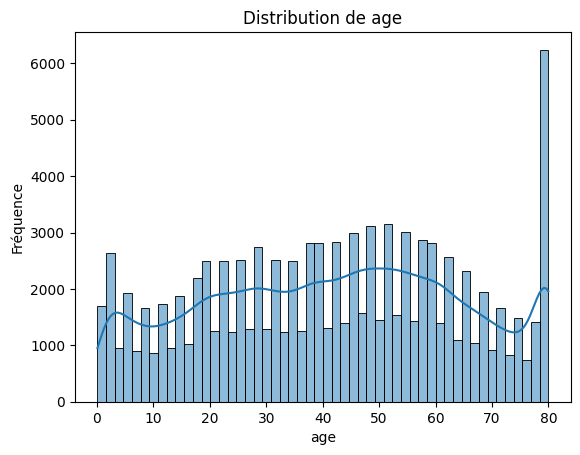

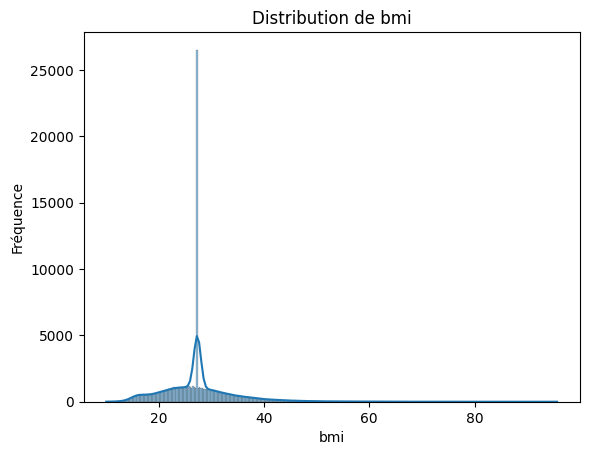

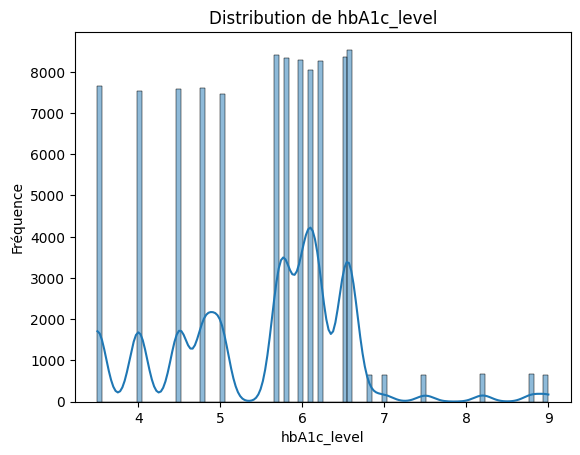

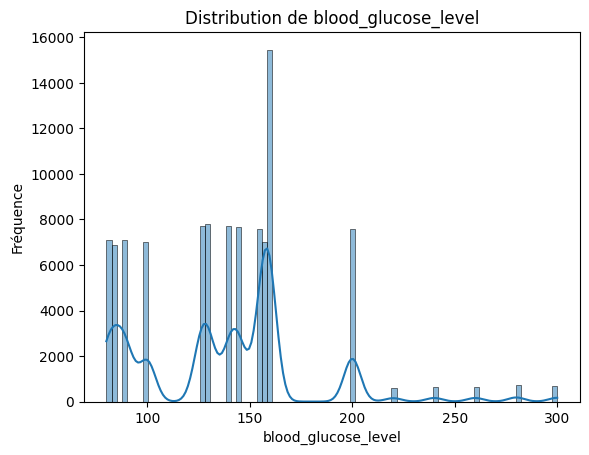

In [64]:
# Graphique de distribution des variables continues
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

 Les histogrammes affichés montrent comment chaque variable est répartie.

 Points clés à observer :

    Une distribution normale (courbe en cloche) peut être attendue pour l'âge.
    L'IMC peut avoir une distribution asymétrique si de nombreux patients sont en surpoids ou obèses.
    Si hbA1c_level ou blood_glucose_level montre une forte asymétrie, cela peut indiquer la présence de nombreux cas de diabète sévère.

les corrélation avec la sortie


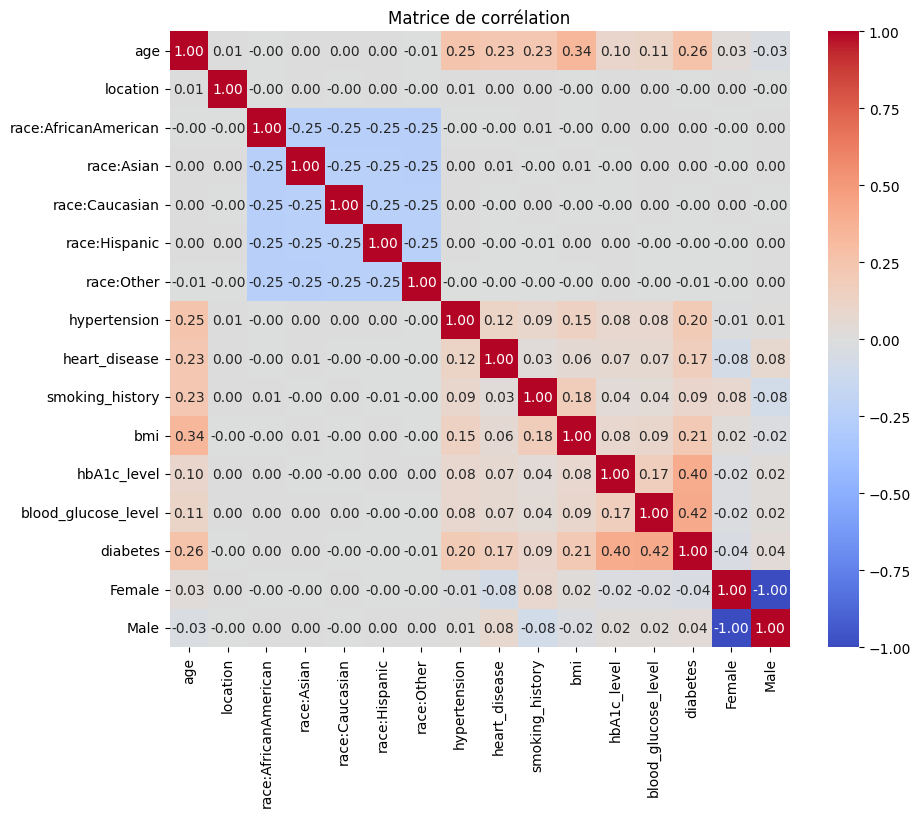

In [16]:
# Analyse de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

3. Matrice de Corrélation

La matrice affiche les corrélations entre les variables. Les valeurs proches de 1 ou -1 indiquent des relations fortes.

   Observations possibles :

    Une forte corrélation entre hbA1c_level et blood_glucose_level est attendue, car le glucose sanguin influence directement l’HbA1c.
    Une corrélation modérée entre l’IMC et le glucose sanguin peut être un indicateur du lien entre obésité et diabète.
    L’âge pourrait avoir une faible corrélation avec le niveau de glucose, sauf si l’échantillon contient majoritairement des personnes âgées atteintes de diabète.

Conclusion Générale

    Les distributions et la corrélation permettent d'identifier les facteurs les plus influents pour la prédiction du diabète.
    Les distributions nous donnent une première idée du profil des patients (âge, IMC, etc.).
La matrice de corrélation confirme les relations attendues entre certaines variables (ex. blood_glucose_level et hbA1c_level)

In [17]:
# 3. Normalisation des valeurs continues
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Vérification des transformations
print(df.head())

        age  location  race:AfricanAmerican  race:Asian  race:Caucasian  \
0 -0.439136         0                     0           0               0   
1 -0.572369         0                     0           1               0   
2 -1.060886         0                     0           0               0   
3 -0.039440         0                     0           0               1   
4  0.449078         0                     1           0               0   

   race:Hispanic  race:Other  hypertension  heart_disease  smoking_history  \
0              0           1             0              0                4   
1              0           0             0              0                4   
2              0           1             0              0                4   
3              0           0             0              0                4   
4              0           0             0              0                4   

        bmi  hbA1c_level  blood_glucose_level  diabetes  Female  Male  
0 -0.000

In [18]:
# Séparation des données en variables d'entrée (X) et cible (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [19]:
X

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,Female,Male
0,-0.439136,0,0,0,0,0,1,0,0,4,-0.000114,-0.492714,-0.934869,1,0
1,-0.572369,0,0,1,0,0,0,0,0,4,-1.110586,-0.492714,-1.180513,1,0
2,-1.060886,0,0,0,0,0,1,0,0,4,-0.536515,-0.679515,0.538997,0,1
3,-0.039440,0,0,0,1,0,0,0,0,4,-0.000114,-1.426718,0.514433,0,1
4,0.449078,0,1,0,0,0,0,0,0,4,-0.538022,0.908292,-1.180513,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.394726,54,0,0,0,0,1,0,0,4,-0.920736,0.908292,-1.180513,1,0
99996,1.692577,54,0,1,0,0,0,0,0,0,1.407187,0.161089,-0.934869,1,0
99997,0.182613,54,0,1,0,0,0,0,0,2,1.325822,0.628091,0.489869,0,1
99998,0.404667,54,1,0,0,0,0,0,0,5,0.296715,0.441290,0.416175,1,0


In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 99982, dtype: int64

In [21]:
# Diviser en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Affichage des tailles des ensembles
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (79985, 15), Test set: (19997, 15)


In [23]:
# Création et entraînement du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Prédictions sur les données de test
y_pred = model.predict(X_test) 

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# Probabilité pour ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [27]:
y_pred_proba

array([0.02, 0.  , 0.  , ..., 0.  , 0.  , 0.01])

Évaluation via un rapport de classification et une matrice de confusion.

In [28]:
# Évaluation du modèle
print("📌 Classification Report :")
print(classification_report(y_test, y_pred))

📌 Classification Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18254
           1       0.99      0.70      0.82      1743

    accuracy                           0.97     19997
   macro avg       0.98      0.85      0.90     19997
weighted avg       0.97      0.97      0.97     19997



In [29]:
from sklearn.metrics import precision_score

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f"🎯 Précision : {precision:.3f}")

🎯 Précision : 0.986


Visualisation de l'importance des caractéristiques pour identifier les variables les plus influentes

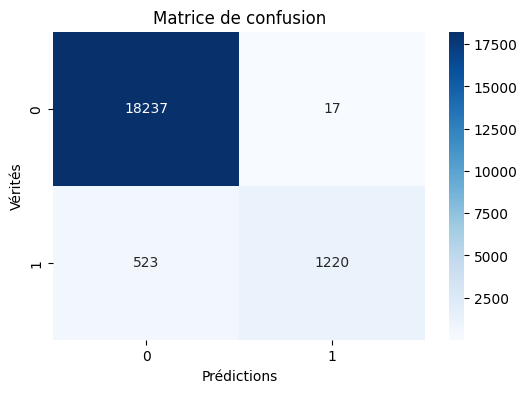

In [30]:
# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

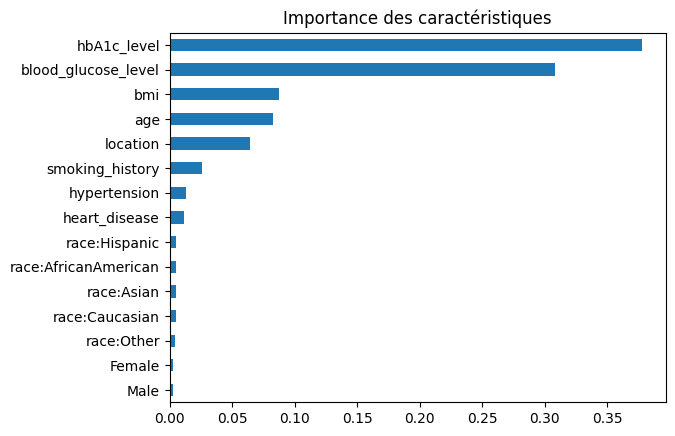

In [31]:
# Importance des caractéristiques
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Importance des caractéristiques')
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
# Modélisation avec Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
# Prédictions et évaluation du modèle
y_pred = model.predict(X_test)

print("\n--- Rapport de classification ---")
print(classification_report(y_test, y_pred))


--- Rapport de classification ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18254
           1       0.87      0.66      0.75      1743

    accuracy                           0.96     19997
   macro avg       0.92      0.82      0.86     19997
weighted avg       0.96      0.96      0.96     19997



In [34]:
from sklearn.metrics import precision_score

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f"🎯 Précision : {precision:.3f}")

🎯 Précision : 0.866


In [35]:
from xgboost import XGBClassifier

# Création et entraînement du modèle XGBoost (sans le paramètre use_label_encoder)
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [36]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_pred_proba

array([1.68262428e-04, 1.04646715e-04, 7.65071670e-03, ...,
       2.31392114e-05, 1.12375859e-02, 6.47303896e-05], dtype=float32)

In [39]:
# Rapport de classification
print("📌 Classification Report :")
print(classification_report(y_test, y_pred))

📌 Classification Report :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18254
           1       0.99      0.70      0.82      1743

    accuracy                           0.97     19997
   macro avg       0.98      0.85      0.90     19997
weighted avg       0.97      0.97      0.97     19997



In [40]:
from sklearn.metrics import precision_score

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f"🎯 Précision : {precision:.3f}")

🎯 Précision : 0.990


j'ai choissi ces trois modèles parcequ'ils fournissent une prédiction de base du risque de diabète les meilleurs par rapport au données que j'ai
après l'analyse des données et l'entrainement de ces modèles , on remarque grâce à des évaluations basées sur la précision et à la matrice de cofusion que le XGBoost donne le meilleur précision, c'est pouquoi on garde le modèle XGBoost

In [41]:
!pip install joblib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Le fichier modele_diabete.joblib contiendra les poids et la structure du modèle.

In [49]:
import joblib

# Supposons que votre modèle s'appelle 'model'
#joblib.dump(model, 'modele_diabete.joblib')

In [48]:
# Sauvegarder avec Booster.save_model()
model.get_booster().save_model("xgb_model.json")

In [46]:
# Charger le modèle sauvegardé
model_loaded = joblib.load('modele_diabete.joblib')

# Utiliser le modèle chargé pour des prédictions
y_pred = model_loaded.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pip install -r requirements.txt
pip list
python app.py